# Mini Project 1    

- Justin Volheim
- A16582348

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

1. Performance Metrics: Let ˆx be the estimate of x obtained from OMP. To measure the       
performance of OMP, we consider the Normalized Error defined as

In [2]:

def Normalized_Error(x,x_OMP):
    return np.linalg.norm(x-x_OMP)/np.linalg.norm(x)

2. Experimental setup:      

(a) Generate A as a random matrix with independent and identically distributed entries
drawn from the standard normal distribution. Normalize the columns of A

In [3]:
def gen_A(shape):
    assert len(shape) == 2
    A = np.random.rand(*shape)
    A = A/np.linalg.norm(A, axis=0)
    return A

gen_A((3, 2))

array([[0.59738279, 0.64602825],
       [0.65610716, 0.49219122],
       [0.4611477 , 0.58343407]])

(b) Generate the sparse vector x with random support of cardinality s (i.e. s indices are
generated uniformly at random from integers 1 to N), and non-zero entries drawn as
uniform random variables in the range [−10,−1] ∪[1,10]

In [4]:

def gen_x(s,N):
    
    indeces = np.random.choice(N, s, replace=False)
    x = np.zeros((N,1))
    for i in indeces:
        x[i] = ((-1)**np.random.randint(2))*10*np.random.rand()
    return x, indeces

gen_x(1, 3)

(array([[0.        ],
        [0.        ],
        [0.56712977]]),
 array([2]))

(c) The entries of noise n are drawn independently from the normal distribution with stan-
dard deviation σ and zero mean.

In [5]:

def gen_noise(N, sigma):
    return np.random.normal(0, sigma, N).reshape(-1,1)

gen_noise(3, 0.1)

array([[-0.01730696],
       [-0.17616517],
       [-0.00876731]])

(d) For each cardinality s ∈[1,smax], the average Normalized Error should be computed by    

repeating step (a) to step (c) 2000 times and averaging the results over these 2000 Monte   

Carlo runs

In [6]:

def OMP(A, y,sparcity = None, Acceptable_res_error=1e-5):

    M, N = A.shape
    if sparcity == None:
        sparcity = N
    
    pre_x = np.zeros((N,1))
    residual = y.copy()
    S = []
    while np.linalg.norm(residual) > Acceptable_res_error and len(S) <= sparcity:
        # Most corelated atoms
        j = np.argmax(np.abs(A.T@residual))

        # add atoms 
        S.append(j)

        # submatrix of selected atoms
        A_S = A[:, S]
        
        #least squares
        pre_x[S] = np.linalg.pinv(A_S)@y
       
        #update residual
        residual = y - A@pre_x
        
    return pre_x , S

3. Noiseless case: (n = 0)  
Implement OMP (you may stop the OMP iterations once ∥y −Ax(k)∥2 is close to 0, here 
x(k) is the estimation of x after kth iteration) and evaluate its performance. Calculate the    
probability of Exact Support Recovery (i.e. the fraction of runs when ˆS = S) by averaging  
over 2000 random realizations of A, as a function of M and smax (for different fixed values of  
N). For each N, the probability of exact support recovery is a two dimensional plot (function   
of M and smax) and you can display it as an image. The resulting plot is called the “noiseless  
phase transition" plot, and it shows how many measurements (M) are needed for OMP to    
successfully recover the sparse signal, as a function of smax. Do you observe a sharp transition    
region where the probability quickly transitions from a large value (close to 1) to a very small    
value (close to 0)? Generate different phase transition plots for the following values of N:    
20, 50 and 100. Regenerate phase transition plots for average Normalized Error (instead of  
probability of successful support recovery). Comment on both kinds of plots 

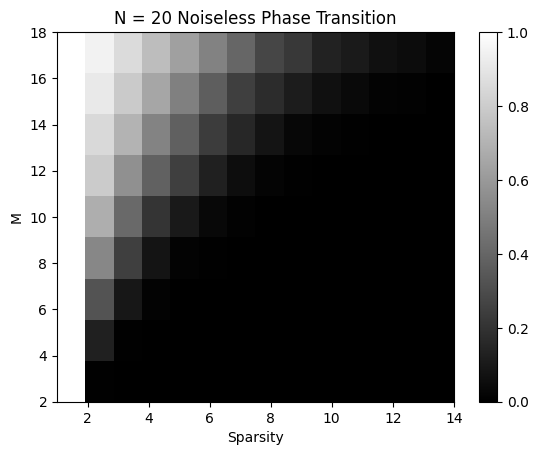

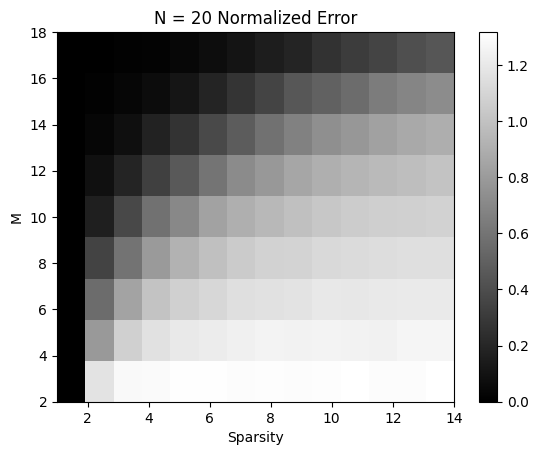

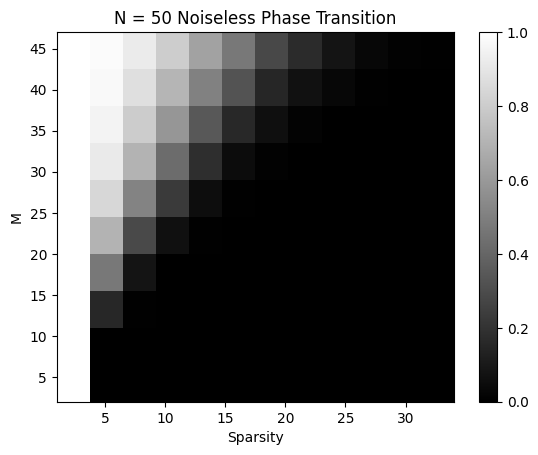

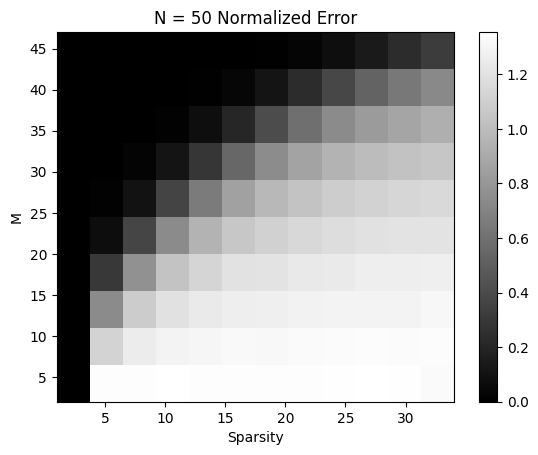

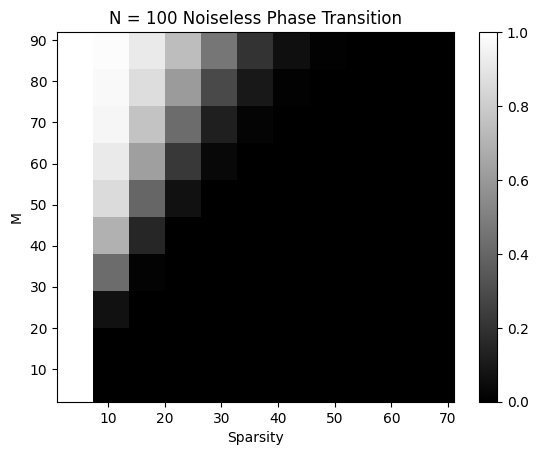

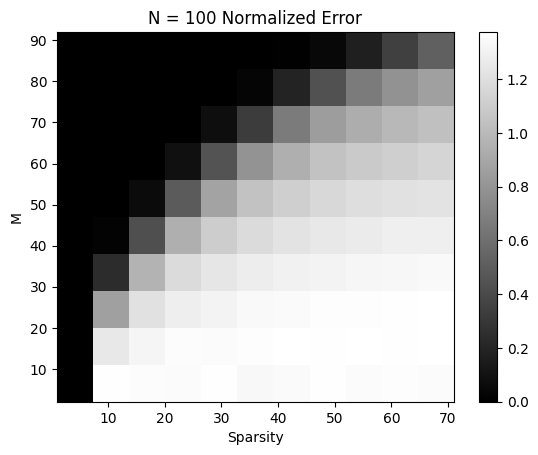

In [7]:
# probability of exact recovery 
'''
when S from OMP is equal to the true S ie the sparcity index of x /2000
'''
# normalized error
'''
sum(||x-x_OMP||/||x||)/2000
'''
N_set = [20,50,100]
M_set_tick= [2,5,10]

for i,N in enumerate(N_set):    
    M_set = range(2, N,M_set_tick[i])
    sparcity_ranges = range(1, 3*N//4,3*M_set_tick[i]//4)

    noiseless_phase_transition = np.zeros((len(M_set), len(sparcity_ranges)))
    AVG_Norm_Error = np.zeros((len(M_set), len(sparcity_ranges)))
    for j, M in enumerate(M_set):
        for k,s in enumerate(sparcity_ranges):
            Norm_Error = []
            recovery_count = 0
            for _ in range(2000):
                A = gen_A((M, N))
                x, indeces = gen_x(s, N)
                y = (A@x).reshape(-1,1)
               
                x_OMP, S = OMP(A, y) 
                Norm_Error.append(Normalized_Error(x,x_OMP))
                if set(S) == set(indeces):
                    recovery_count += 1
            #print( 'M:', M, 's:', s, 'recovery:', recovery_count/2000, 'error:', np.mean(Norm_Error))       
            noiseless_phase_transition[len(M_set)-j-1,k] = recovery_count/2000
            AVG_Norm_Error[len(M_set)-j-1,k] = np.mean(Norm_Error)
            
            
    plt.figure()
    plt.imshow(noiseless_phase_transition, cmap='gray', extent=[sparcity_ranges[0], sparcity_ranges[-1],M_set[0], M_set[-1]], aspect='auto')
    plt.colorbar()
    plt.xlabel('Sparsity')
    plt.ylabel('M')
    plt.title('N = '+str(N)+' Noiseless Phase Transition')
    plt.show()

    plt.figure()
    plt.imshow(AVG_Norm_Error, cmap='gray', extent=[sparcity_ranges[0], sparcity_ranges[-1],M_set[0], M_set[-1]], aspect='auto')
    plt.colorbar()
    plt.xlabel('Sparsity')
    plt.ylabel('M')
    plt.title('N = '+str(N)+' Normalized Error')
    plt.show()

In [8]:
'''
Based on these graphs there appears to be a sharp transition line of aproximate logrithmic shape 
deliniating the region where the OMP algorithm can recover the values of x. With the region of recovery
being above the line.

It also apears that the revovery and error rate are flipped along this line. Illistrating that the
error rate is higher when the recovery rate is lower and vice versa.
'''

'\nBased on these graphs there appears to be a sharp transition line of aproximate logrithmic shape \ndeliniating the region where the OMP algorithm can recover the values of x. With the region of recovery\nbeing above the line.\n\nIt also apears that the revovery and error rate are flipped along this line. Illistrating that the\nerror rate is higher when the recovery rate is lower and vice versa.\n'

4. Noisy case: (n ̸= 0)  
(a) Assume that sparsity s is known. Implement OMP, and terminate the algorithm after   
first s columns of A are selected. Generate “noisy phase transition" plots (for fixed N 
and σ) where success is defined as the event that the Normalized Error is less than 10−3.   
Repeat the experiment for two values of σ (one small and one large) and choose N as 
20, 50, and 100. Comment on the results.    

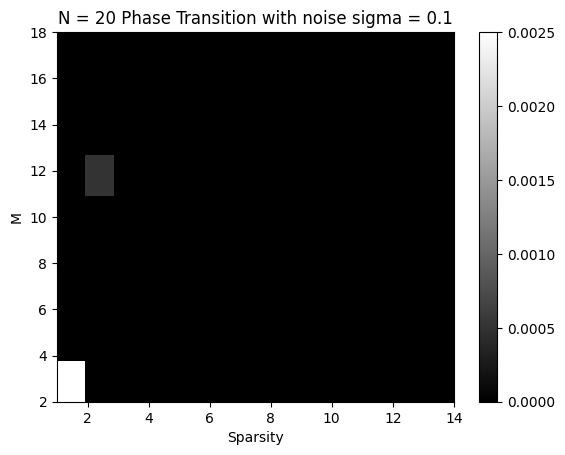

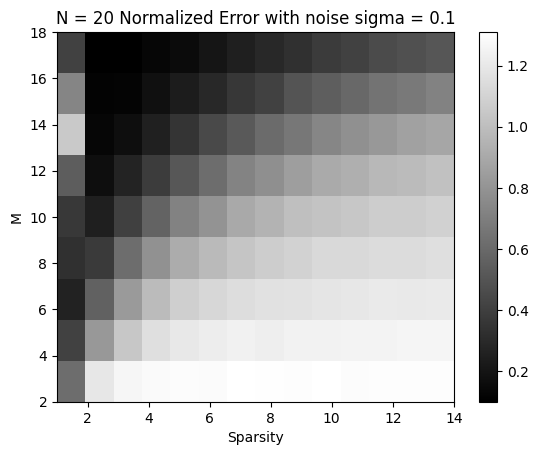

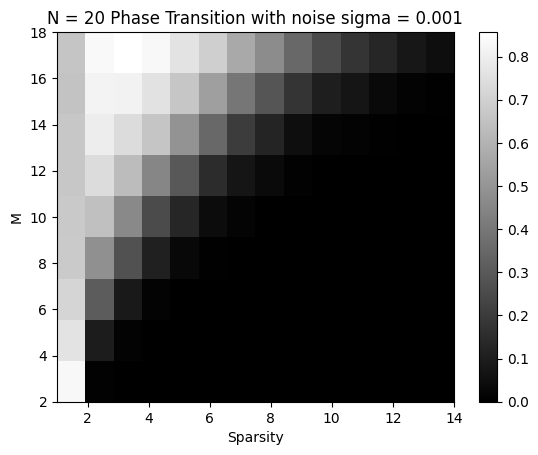

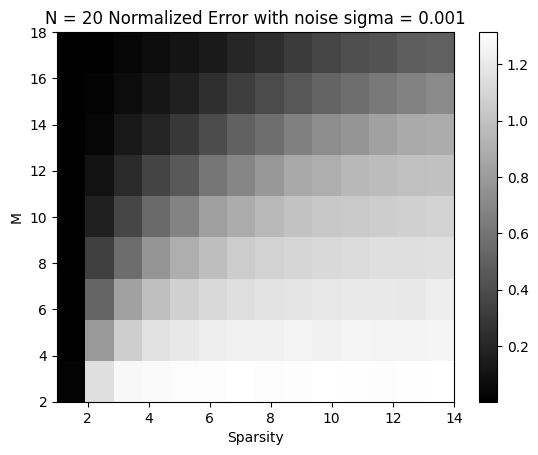

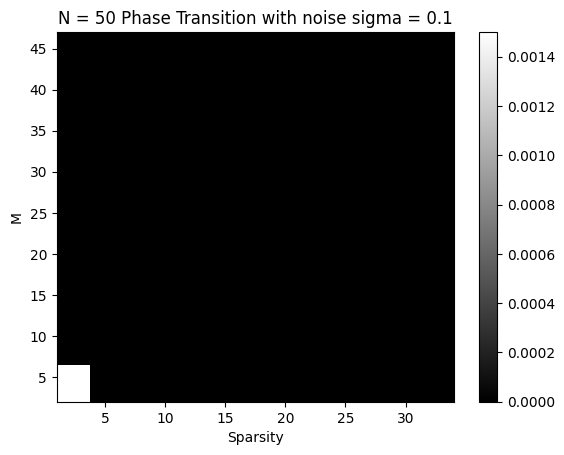

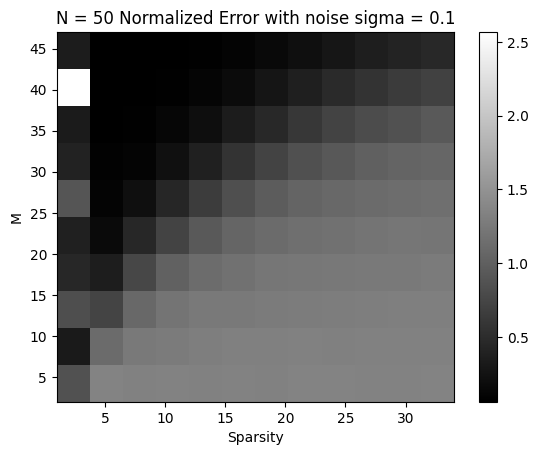

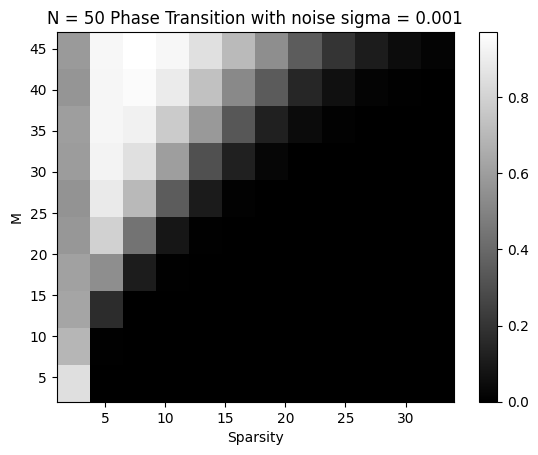

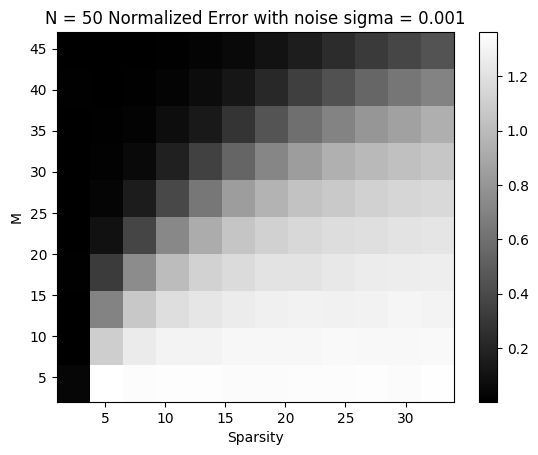

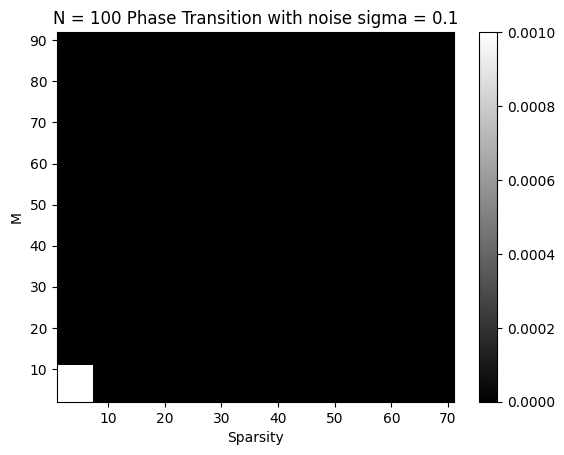

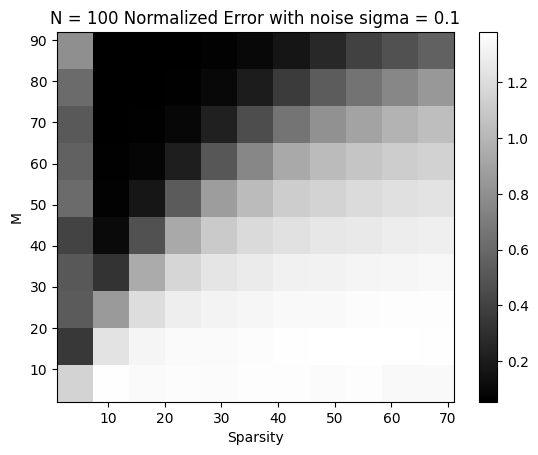

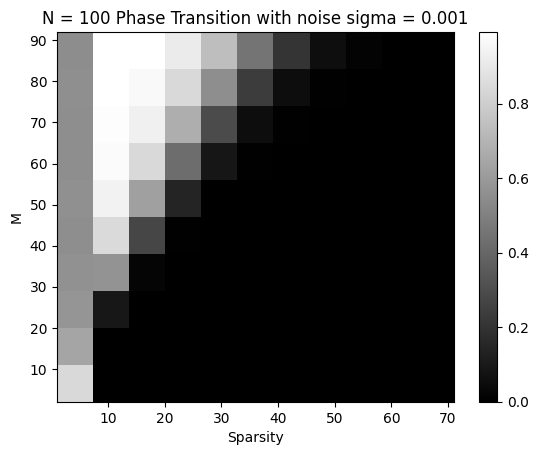

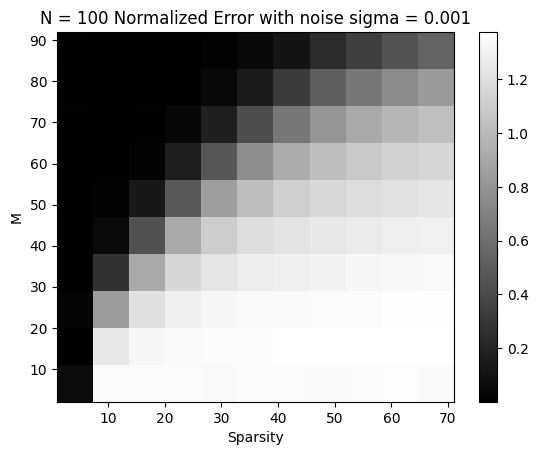

In [9]:
N_set = [20,50,100]
M_set_tick= [2,5,10]
sig_set = [0.1,0.001]

for i,N in enumerate(N_set):    
    M_set = range(2, N,M_set_tick[i])
    sparcity_ranges = range(1,3*N//4,3*M_set_tick[i]//4)
    for sig in sig_set:
        noiseless_phase_transition = np.zeros((len(M_set), len(sparcity_ranges)))
        AVG_Norm_Error = np.zeros((len(M_set), len(sparcity_ranges)))
        for j, M in enumerate(M_set):
            for k,s in enumerate(sparcity_ranges):
                Norm_Error = []
                recovery_count = 0
                for _ in range(2000):
                    A = gen_A((M, N))
                    x, indeces = gen_x(s, N)
                    noise = gen_noise(M, sig)

                    y = (A@x).reshape(-1,1)+noise
                
                    x_OMP, S = OMP(A, y,sparcity=s) 
                    Norm_Error.append(Normalized_Error(x,x_OMP))
                    if Norm_Error[-1] < 1e-3:
                        recovery_count += 1
                #print( 'M:', M, 's:', s, 'recovery:', recovery_count/2000, 'error:', np.mean(Norm_Error))       
                noiseless_phase_transition[len(M_set)-j-1,k] = recovery_count/2000
                AVG_Norm_Error[len(M_set)-j-1,k] = np.mean(Norm_Error)
                
                
        plt.figure()
        plt.imshow(noiseless_phase_transition, cmap='gray', extent=[sparcity_ranges[0], sparcity_ranges[-1],M_set[0], M_set[-1]], aspect='auto')
        plt.colorbar()
        plt.xlabel('Sparsity')
        plt.ylabel('M')
        plt.title('N = '+str(N)+' Phase Transition with noise sigma = '+str(sig))
        plt.show()

        plt.figure()
        plt.imshow(AVG_Norm_Error, cmap='gray', extent=[sparcity_ranges[0], sparcity_ranges[-1],M_set[0], M_set[-1]], aspect='auto')
        plt.colorbar()
        plt.xlabel('Sparsity')
        plt.ylabel('M')
        plt.title('N = '+str(N)+' Normalized Error with noise sigma = '+str(sig))
        plt.show()
    

In [10]:
'''
Based on these results we can accuratly say that the OMP algorithm is robust to noise with sigma = 0.001
however it does not handle noise with sigma = 0.1 well. This is shown by the fact that the recovery rate
is almost all zeros. This is also shown by the fact that the error rate is much higher for sigma = 0.1. 
For sigma=0.1 we can see that the error rate takes the same shape as the recovery rate in the noiseless case.
This means that the only reason our recovery rate is zero is due to the measurment of sucsess being to high for 
this noise level.
'''

'\nBased on these results we can accuratly say that the OMP algorithm is robust to noise with sigma = 0.001\nhowever it does not handle noise with sigma = 0.1 well. This is shown by the fact that the recovery rate\nis almost all zeros. This is also shown by the fact that the error rate is much higher for sigma = 0.1. \nFor sigma=0.1 we can see that the error rate takes the same shape as the recovery rate in the noiseless case.\nThis means that the only reason our recovery rate is zero is due to the measurment of sucsess being to high for \nthis noise level.\n'

(b) Assume the sparsity s is NOT known, but ∥n∥2 is known. Implement OMP where you      
may stop the OMP iterations once ∥y −Ax(k)∥ ≤ ∥n∥2). Generate phase transition      
plots using the same criterion for success as the previous part. Comment on the results.        

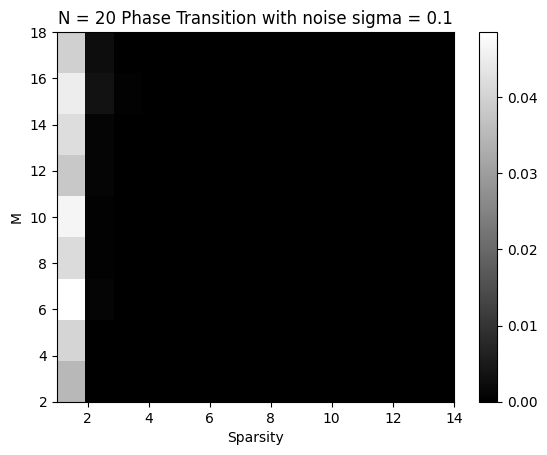

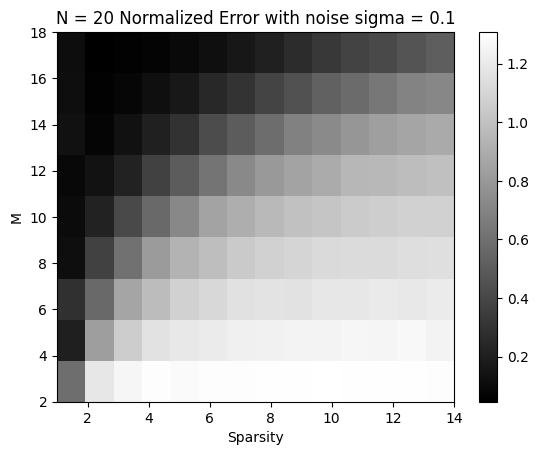

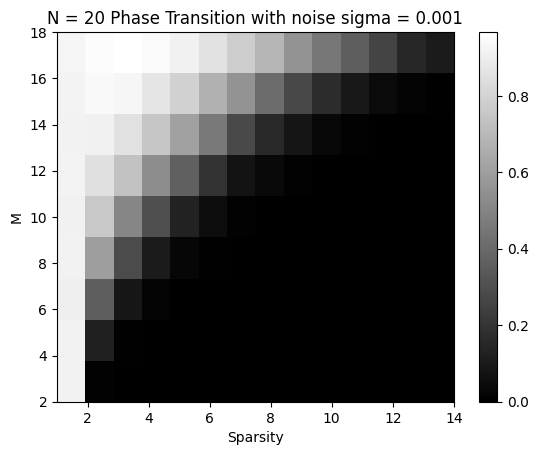

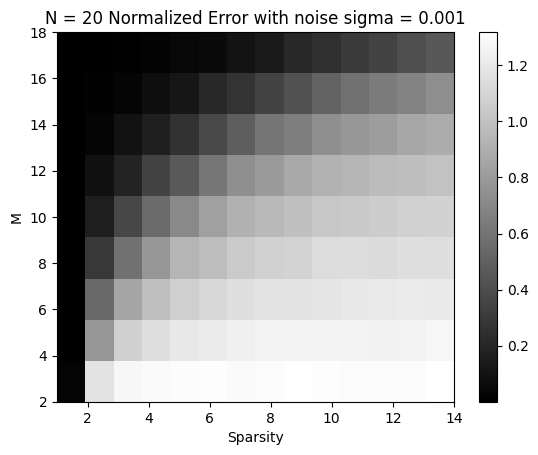

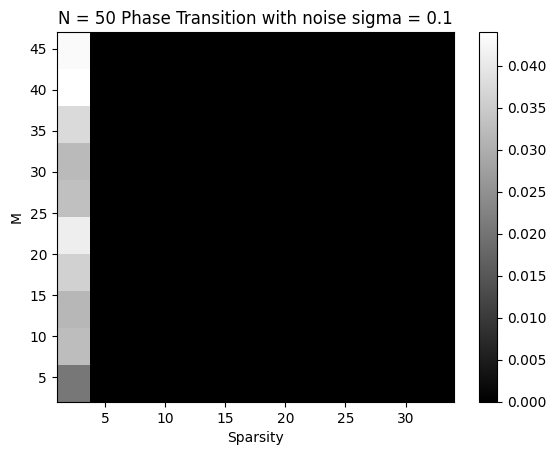

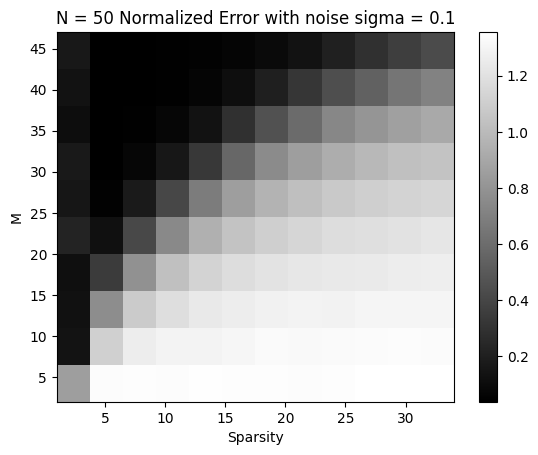

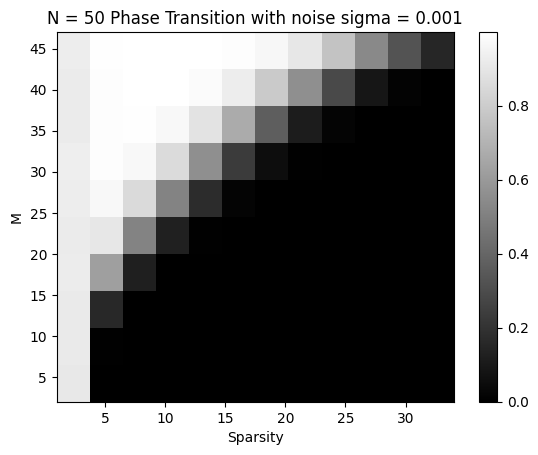

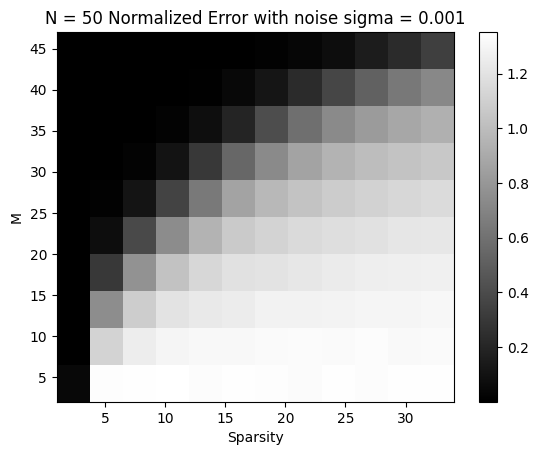

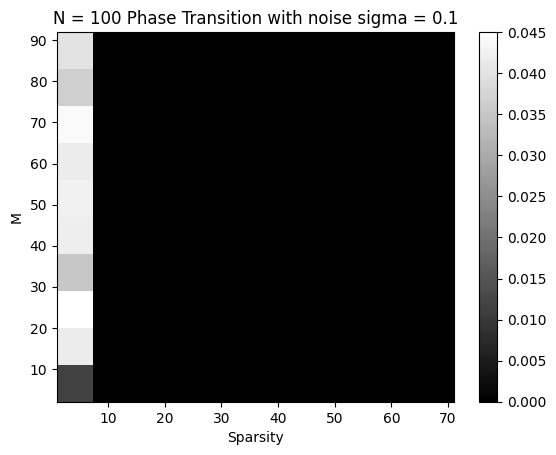

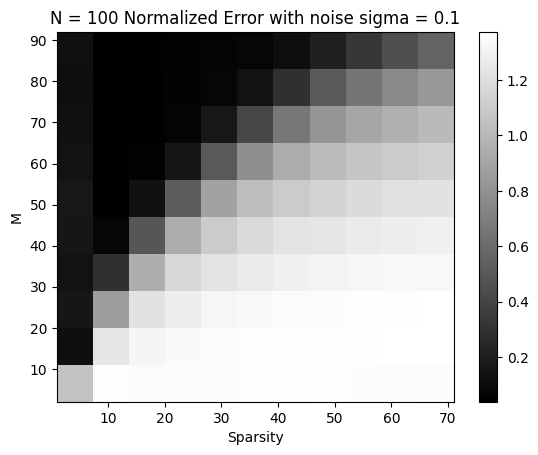

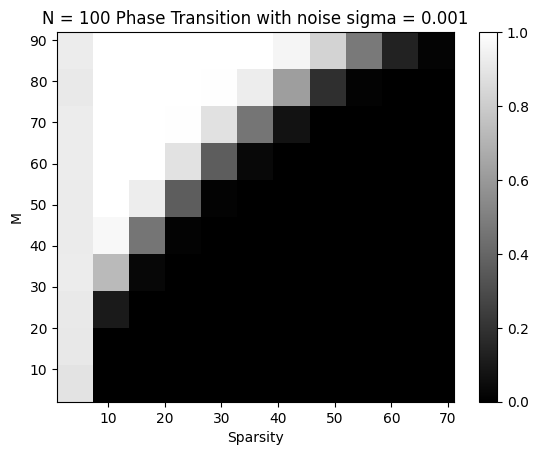

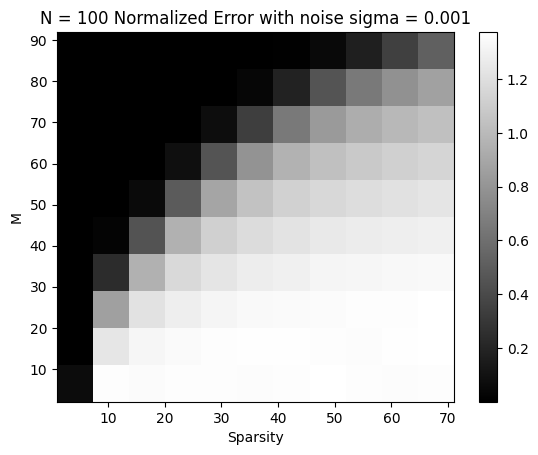

In [11]:
N_set = [20,50,100]
M_set_tick= [2,5,10]
sig_set = [0.1,0.001]

for i,N in enumerate(N_set):    
    M_set = range(2, N,M_set_tick[i])
    sparcity_ranges = range(1,3*N//4,3*M_set_tick[i]//4)
    for sig in sig_set:
        noiseless_phase_transition = np.zeros((len(M_set), len(sparcity_ranges)))
        AVG_Norm_Error = np.zeros((len(M_set), len(sparcity_ranges)))
        for j, M in enumerate(M_set):
            for k,s in enumerate(sparcity_ranges):
                Norm_Error = []
                recovery_count = 0
                for _ in range(2000):
                    A = gen_A((M, N))
                    x, indeces = gen_x(s, N)
                    noise = gen_noise(M, sig)

                    y = (A@x).reshape(-1,1)+noise
                
                    x_OMP, S = OMP(A, y,Acceptable_res_error=np.linalg.norm(noise)) 

                    Norm_Error.append(Normalized_Error(x,x_OMP))
                    if Norm_Error[-1] < 1e-3:
                        recovery_count += 1
                # print( 'M:', M, 's:', s, 'recovery:', recovery_count/2000, 'error:', np.mean(Norm_Error))       
                noiseless_phase_transition[len(M_set)-j-1,k] = recovery_count/2000
                AVG_Norm_Error[len(M_set)-j-1,k] = np.mean(Norm_Error)
                
                
        plt.figure()
        plt.imshow(noiseless_phase_transition, cmap='gray', extent=[sparcity_ranges[0], sparcity_ranges[-1],M_set[0], M_set[-1]], aspect='auto')
        plt.colorbar()
        plt.xlabel('Sparsity')
        plt.ylabel('M')
        plt.title('N = '+str(N)+' Phase Transition with noise sigma = '+str(sig))
        plt.show() 

        plt.figure()
        plt.imshow(AVG_Norm_Error, cmap='gray', extent=[sparcity_ranges[0], sparcity_ranges[-1],M_set[0], M_set[-1]], aspect='auto')
        plt.colorbar()
        plt.xlabel('Sparsity')
        plt.ylabel('M')
        plt.title('N = '+str(N)+' Normalized Error with noise sigma = '+str(sig))
        plt.show()
    

In [12]:
'''
These results are very similar to the previous results. The only difference is that the recovery rate is
slightly higher for sigma = 0.1. This is due to how the OMP is now stopped when the residual resembles the noise. 
Based on the two methods i would say that stopping based on the norm of the noise is a much stronger conditioning 
value with respect to recovery rate.
'''

'\nThese results are very similar to the previous results. The only difference is that the recovery rate is\nslightly higher for sigma = 0.1. This is due to how the OMP is now stopped when the residual resembles the noise. \nBased on the two methods i would say that stopping based on the norm of the noise is a much stronger conditioning \nvalue with respect to recovery rate.\n'

5. Decode a Compressed Message: In this part of the assignment, you will uncover a hidden   
message from their compressed sketches (generated using random measurement matrices)    
using the OMP algorithm that seeks the sparsest solution. An unknown and sparse image X,    
containing a message, has been compressed using three different random matrices (of different   
sizes) A1,A2,A3 to produce three corrupted images as follows    
Yi = AiX    
The corrupted images and the measurement matrices can be accessed from this link    
(a) Can you guess the message by simply displaying the compressed images?   
(b) Using OMP, recover X from Y1,Y2,Y3. Figure out the appropriate stopping criteria.   
Reshape the recovered X into a 2D image of size 90×160 and decode the message. Show 
your results for each case. Compare these results with the Least Squares Solution†. 
(c) Which corrupted image gave you the best result for OMP? Can you explain why?    
(d) (For Fun) Can you make an (educated) guess about the meaning of this message?   

In [13]:
# load mat file
import scipy.io
mat = scipy.io.loadmat('./Data/Part5data.mat')
print(mat.keys())
print(mat['A3'].shape)
print(mat['y3'].shape)

dict_keys(['__header__', '__version__', '__globals__', 'A1', 'A2', 'A3', 'y1', 'y2', 'y3'])
(2880, 14400)
(2880, 1)


(a) Can you guess the message by simply displaying the compressed images?       

In [14]:
'''
NO because the compressed image will have an unkown dimentionality therefore making any image useless. 
'''

'\nNO because the compressed image will have an unkown dimentionality therefore making any image useless. \n'

(b) Using OMP, recover X from Y1,Y2,Y3. Figure out the appropriate stopping criteria.   
Reshape the recovered X into a 2D image of size 90×160 and decode the message. Show         
your results for each case. Compare these results with the Least Squares Solution†. 

In [15]:
''' Sparsity chosen based on a linear approximation of the logrithmic curve in part 3'''

' Sparsity chosen based on a linear approximation of the logrithmic curve in part 3'

480


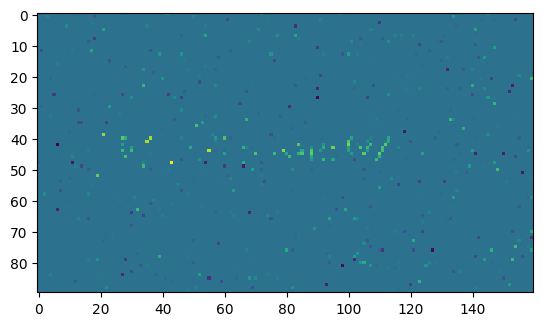

In [16]:
print(mat['y1'].shape[0]//2)
img,_ = OMP(mat['A1'], mat['y1'],sparcity=mat['y1'].shape[0]//2)
plt.imshow(img.reshape(160,90).T)
plt.show()

720


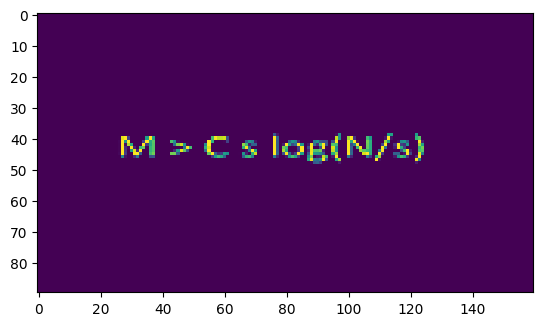

In [17]:
print(mat['y2'].shape[0]//2)
img,_ = OMP(mat['A2'], mat['y2'],sparcity=mat['y2'].shape[0]//2)
plt.imshow(img.reshape(160,90).T)
plt.show()

1440


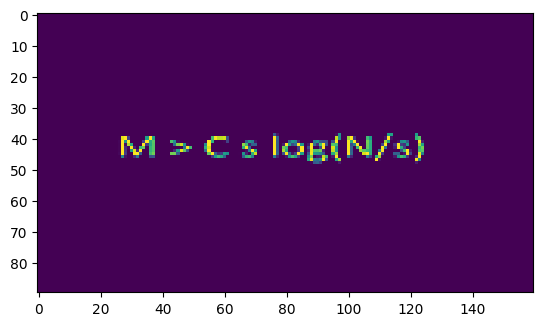

In [18]:
print(mat['y3'].shape[0]//2)
img,_ = OMP(mat['A3'], mat['y3'],sparcity=mat['y3'].shape[0]//2)
plt.imshow(img.reshape(160,90).T)
plt.show()

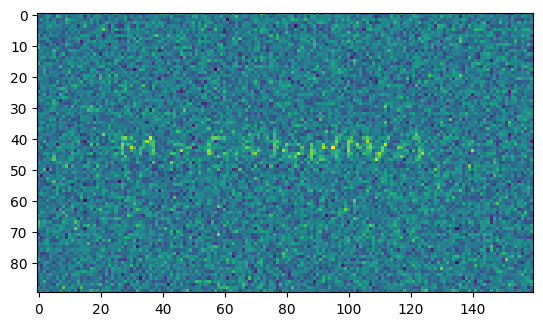

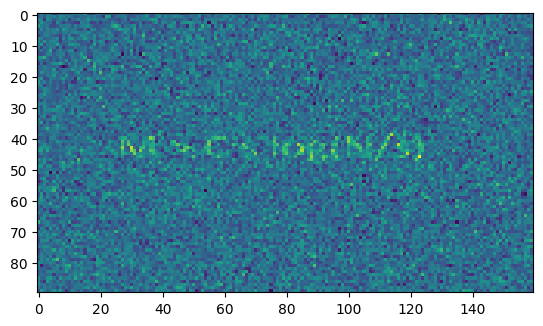

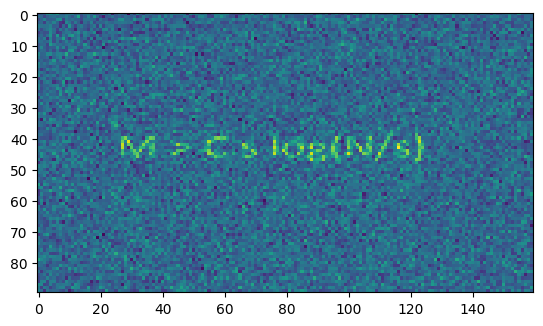

In [19]:
plt.imshow((np.linalg.pinv(mat['A1'])@mat['y1']).reshape(160,90).T)
plt.show()
plt.imshow((np.linalg.pinv(mat['A2'])@mat['y2']).reshape(160,90).T)
plt.show()
plt.imshow((np.linalg.pinv(mat['A3'])@mat['y3']).reshape(160,90).T)
plt.show()

In [20]:
'''
Based off of these results we can see that OMP returned a robust and accurant image for both arrays 2,3. 
However was not able to accurately resolve the first array. This is due to the fact that the first array is
to sparse for the OMP algorithm to resolve. For the least squares solution we can see that the image is very
staticy and not very clear. This is due to the fact that the least squares solution is not robust to noise.
However it did preform slightly better for the first array. 
'''

'\nBased off of these results we can see that OMP returned a robust and accurant image for both arrays 2,3. \nHowever was not able to accurately resolve the first array. This is due to the fact that the first array is\nto sparse for the OMP algorithm to resolve. For the least squares solution we can see that the image is very\nstaticy and not very clear. This is due to the fact that the least squares solution is not robust to noise.\nHowever it did preform slightly better for the first array. \n'

(c) Which corrupted image gave you the best result for OMP? Can you explain why?    
(d) (For Fun) Can you make an (educated) guess about the meaning of this message? 

In [21]:
'''c) 
Both image 2 and 3 gave aproximatly the same result, however image 2 took less computational
power therefore i would consider it the best result. The reason it was the reconstructed in contrast
to the first image is due to the value of M, the first image had a much smaller M dim which resulted in
a poor reconstruction. Assuming the coruption was constant across all images, the first image would require
a larger M dimension to be reconstructed properly.
'''

'''d)
Based on context it might be an adaptation on the inequality that represents the relationship between the number of measurements
and the sparcity of the signal for reconstruction. 
'''

'd)\nBased on context it might be an adaptation on the inequality that represents the relationship between the number of measurements\nand the sparcity of the signal for reconstruction. \n'

6. Decode a Compressed Audio Signal: In this part, you will uncover a hidden message    
from its compressed sketches of an audio signal using the OMP algorithm. An unknown audio   
signal x with frame per second (fps) of 7350 containing a message, has a sparse representation  
over a special basis D: 
x = Ds  
where s is 100-sparse vector of size 15980. The audio signal x has been compressed using a  
random matrix A to produce compressed signal y, as follows  
y = Ax = ADs    
The compressed signal, the measurement matrix A and the special basis D can be accessed 
from this link. 
The basis matrix D is normalized, converted to a 8bit format and saved as a .tiff file to reduce    
the storage size. To recover D use the provided code: loading-data. This function takes the 
address of the folder containing the data as input and returns y,A,D    
(a) Can you guess the message by simply playing the compressed signal? use the following    
Matlab command: 
sound(y,fps)    
(b) For all values of k ∈ K = {10,50,100,200,300,1000,2000,3000}, select first k elements   
of y, (yk = [y]1:k) and first k rows of A, (Ak = [A]1:k,:). Using OMP, recover s from yk    
for all k ∈ K and play x = Ds using sound(x,fps). What is the message? Compare  
these results with the Least Squares Solution.  
(c) What is minimum number of measurements (call it Kmin) that is enough to understand  
the message from the reconstructed audio signal (based on your perception)? Can you 
explain what parameters of problem this number depends on? What is the relation of  
this number to size and sparsity of s? Can you comment on what advantages more  
measurements (over Kmin) offer? 

In [22]:
from Data.load_data import *

y, D, A = loading_data('./Data/')
print(y.shape)
print(D.shape)
print(A.shape)


(3000, 1)
(15980, 15980)
(3000, 15980)


(a) Can you guess the message by simply playing the compressed signal? use the following    
Matlab command: 
sound(y,fps)    

In [23]:
sd.play(y, 7350)
'''
No i cannot guess the correct wording
'''

'\nNo i cannot guess the correct wording\n'

(b) For all values of k ∈ K = {10,50,100,200,300,1000,2000,3000}, select first k elements   
of y, (yk = [y]1:k) and first k rows of A, (Ak = [A]1:k,:). Using OMP, recover s from yk    
for all k ∈ K and play x = Ds using sound(x,fps). What is the message? Compare  
these results with the Least Squares Solution.  

In [24]:
#b)
S= []
for k in [10,50,100,200,300,1000,2000,3000]:
    s,_ = OMP(A[:k,:]@D, y[:k],sparcity=k)
    S.append(s)
    sd.play(D@s, 7350)
    print(k)
    
'''
Outputs: 'I love Linear Algebra'
Coherent at k = 50
'''

10
50
100
200
300
1000
2000
3000


"\nOutputs: 'I love Linear Algebra'\nCoherent at k = 50\n"

### least squares 

In [25]:
x =np.linalg.pinv(A)@y
sd.play(x, 7350)
'''
This least squares solution does not construct a coherent messege. 
Therefore making OMP the superior choice for reconstruction.
'''

'\nThis least squares solution does not construct a coherent messege. \nTherefore making OMP the superior choice for reconstruction.\n'

(c) What is minimum number of measurements (call it Kmin) that is enough to understand      
the message from the reconstructed audio signal (based on your perception)? Can you     
explain what parameters of problem this number depends on? What is the relation of      
this number to size and sparsity of s? Can you comment on what advantages more      
measurements (over Kmin) offer?     

In [26]:
'''
What is minimum number of measurements (call it Kmin) that is enough to understand      
the message from the reconstructed audio signal (based on your perception)?
#
    Kmin =  50;
#
Can you explain what parameters of problem this number depends on? What is the relation of      
this number to size and sparsity of s?
#
   This number depends on N the size of X, and the sparcity of s=100. The relation is logorithmic potentialy
   of the form found in the image from part 5 if so the exact lower bound could be calculated however the 
   constant C is unknown to me.
#
Can you comment on what advantages more      
measurements (over Kmin) offer? 
#
    - More measurements offer more accurate recovery of the signal and robustness to noise. However with
    the increase in time complexity of the OMP algorithm and the deminishing returns much larger values of K are 
    unneeded for our task.
#
'''

'\nWhat is minimum number of measurements (call it Kmin) that is enough to understand      \nthe message from the reconstructed audio signal (based on your perception)?\n#\n    Kmin =  50;\n#\nCan you explain what parameters of problem this number depends on? What is the relation of      \nthis number to size and sparsity of s?\n#\n   This number depends on N the size of X, and the sparcity of s=100. The relation is logorithmic potentialy\n   of the form found in the image from part 5 if so the exact lower bound could be calculated however the \n   constant C is unknown to me.\n#\nCan you comment on what advantages more      \nmeasurements (over Kmin) offer? \n#\n    - More measurements offer more accurate recovery of the signal and robustness to noise. However with\n    the increase in time complexity of the OMP algorithm and the deminishing returns much larger values of K are \n    unneeded for our task.\n#\n'

d) (Bonus) Can you think of the method that has been employed to construct the basis D
that results in a sparse representation of our audio signal x? Can you propose a method
to construct such basis, D?

In [27]:
'''
One method could be to use SVD on a frequency representation of the signal and 
set the sparcity values to corrispond to the least relevant frequencies. 
'''

'\nOne method could be to use SVD on a frequency representation of the signal and \nset the sparcity values to corrispond to the least relevant frequencies. \n'